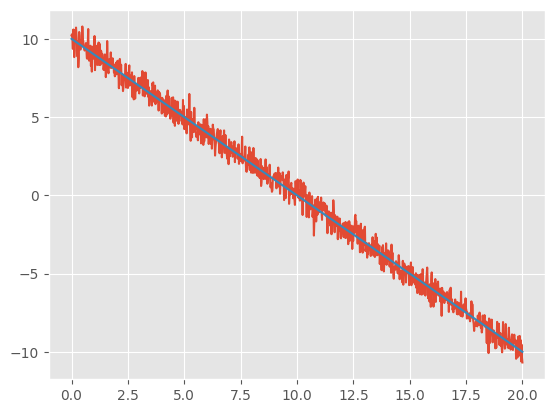

In [5]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def f(x):
    return - x + 10

def df(x):
    return np.full_like(x, -1)

num_samples     = 1000
distance_range  = 20
distances   = np.linspace(0, distance_range, num_samples)

y = f(distances)

noise = np.random.normal(loc=0, scale=1/2, size=num_samples)

noisy_y = y + noise

plt.plot(distances, noisy_y, zorder=1)
plt.plot(distances, y, zorder=2)
plt.show()

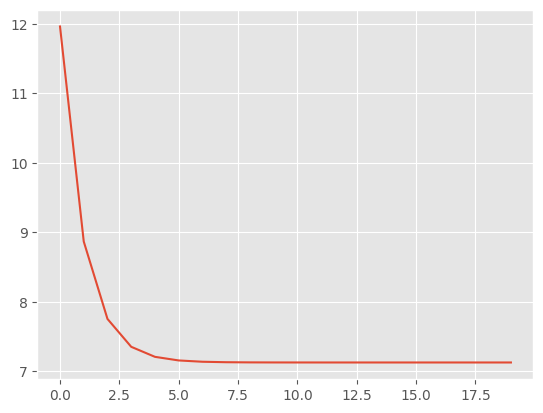

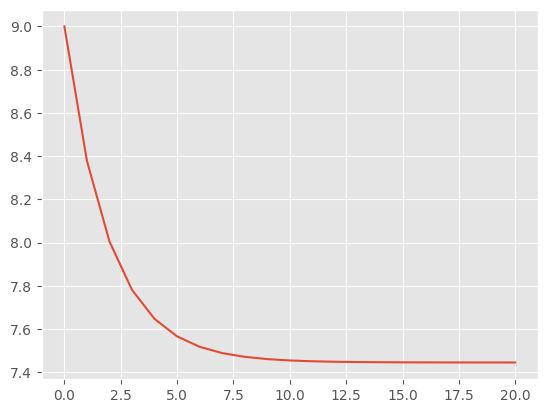

In [15]:
inference_iterations = 20

true_distance   = 6
prior           = 9

sigma_y = 1/2
sigma_x = 1/2

y_sample = 4.11

phi_estimates    = [prior]
vfes            = []

for i in range(inference_iterations):

    error_y = y_sample - f(phi_estimates[-1])

    error_x = phi_estimates[-1] - prior

    phi_estimates.append(phi_estimates[-1] + 0.1 * ((error_y / sigma_y) * df(phi_estimates[-1]) - error_x / sigma_x))

    vfes.append(1 / 2 * ( (error_y**2) / sigma_y + (error_x**2)/sigma_y ) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

plt.plot(vfes)
plt.show()

plt.plot(phi_estimates)
plt.show()


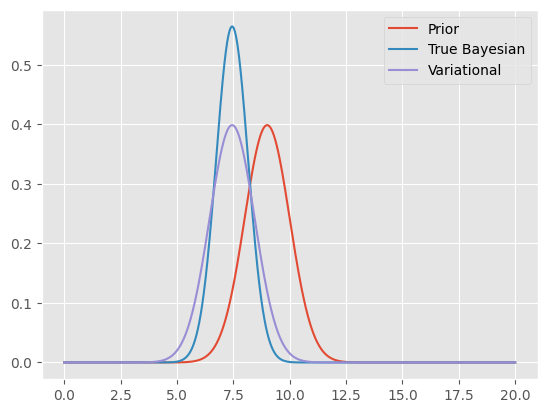

In [16]:
phi = phi_estimates[-1]

numerator = np.multiply(norm.pdf(y_sample, loc=f(distances), scale=1), norm.pdf(distances, loc=prior, scale=1))
normalization = sum(numerator * 0.02)

plt.plot(distances, norm.pdf(distances, loc=prior, scale=1), label='Prior')
plt.plot(distances, numerator / normalization, label='True Bayesian')
plt.plot(distances, norm.pdf(distances, loc=phi, scale=1), label='Variational')

plt.legend()
plt.show()